<a href="https://colab.research.google.com/github/tejaspradhan/Face-Generation-from-Textual-Features-using-GANs/blob/main/Face2Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:
!git clone https://github.com/neerajajaja/Face2Text.git

fatal: destination path 'Face2Text' already exists and is not an empty directory.


In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf

In [ ]:
#!pip install 'h5py==2.10.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loaded=tf.compat.v1.saved_model.load("/content/Face2Text/training_files/")

In [ ]:
model=load_model('/content/Face2Text/training_files/model_x_19.h5')

In [ ]:
#model.save("/content/Face2Text/training_files/")

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 77)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 77, 200)      267200      ['input_3[0][0]']                
                                                                                                  
 dropout_1 (Dropout)            (None, 2048)         0           ['input_2[0][0]']                
                                                                                            

In [ ]:
def greedySearch(photo):
    in_text = 'startseq'
    for i in range(maxv):
        sequence = [wordtoin[w] for w in in_text.split() if w in wordtoin]
        sequence = pad_sequences([sequence], maxlen=maxv)
        yhat = model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = intoword[yhat]
        in_text += ' ' + word
        if word == 'seqend':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

In [ ]:
from keras.applications.xception import Xception
model_enc = Xception(weights='imagenet')

In [ ]:
from keras.models import Model
model_new = Model(model_enc.input, model_enc.layers[-2].output)

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from PIL import Image

In [ ]:
def resize_image(img, target_width=299):
  mywidth = target_width
  wpercent = mywidth/float(img.size[0])
  hsize = int((float(img.size[1])*float(wpercent)))
  img = img.resize((mywidth,hsize), PIL.Image.ANTIALIAS)
  return np.array(img)

In [ ]:
from keras.applications.xception import preprocess_input

In [ ]:
# def preprocess(image):
#     x=resize_image(image)
#     x = np.expand_dims(x, axis=0)
#     x = preprocess_input(x)
#     return x

In [ ]:
def preprocess(image_path):
    img = image.load_img(image_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [ ]:
def encode(image):
    image = preprocess(image) # preprocess the image
    fea_vec = model_new.predict(image) # Get the encoding vector for the image
    fea_vec = np.reshape(fea_vec, fea_vec.shape[1]) # reshape from (1, 2048) to (2048, )
    return fea_vec

In [ ]:
pic="/content/beard2.jpg"
maxv=77

In [ ]:
vocab = pd.read_csv(r'/content/Face2Text/data/vocab.csv',header=None)
wordtoin={}
intoword={}
ind=0
for i in vocab[0]:
    wordtoin[i]=ind
    intoword[ind]=i
    ind+=1 

In [ ]:
!pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer, models
from torch import nn

word_embedding_model = models.Transformer('bert-base-uncased', max_seq_length=256)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=512, activation_function=nn.Tanh())

encoder_model = SentenceTransformer(modules=[word_embedding_model, pooling_model, dense_model])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


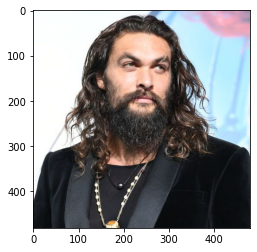

Greedy: male face with a pale skin tone his hair is short and dark coloured and he has a very pale skin


In [ ]:
imagev = encode(pic).reshape((1,2048))
x=plt.imread(pic)
plt.imshow(x)
plt.show()
print("Greedy:",greedySearch(imagev))

In [ ]:
embedding=[]
temp_img_path="/content/drive/MyDrive/Text2Face/Dataset/stylegan_imgs/"
for i in range(500,5500):
  pic=temp_img_path+"seed_"+str(i)+".png"
  imagev = encode(pic)
  imagev = imagev.reshape((1,2048))
  desc=greedySearch(imagev)
  print("Greedy:",i,desc)
  test_embedding = encoder_model.encode(desc)
  embedding.append(test_embedding)

Greedy: 0 a young woman with blonde hair and dark roots her eyes are blue and there is some make up around them her lips are thin and her upper teeth are visible she is smiling
Greedy: 1 a man with short gingerish hair and a trimmed beard he has a wide nose and a strong jaw
Greedy: 2 a young man with short brown hair and small dark eyes his nose is small and his lips are thin his upper teeth are visible and he is smiling
Greedy: 3 a young man with short dark hair and small dark eyes his lips are thin and a stubble beard is growing around them he looks serious
Greedy: 4 a woman with long wavy blond hair and dark roots she has a wide nose and a round face with soft features
Greedy: 5 a young woman with blonde hair and darker roots her eyes are blue and there is some make up around them her lips are thin and her upper teeth are visible she is smiling
Greedy: 6 a young woman with short blond hair and a fringe she has a small nose and a smile with dimples
Greedy: 7 a woman with short blond 

In [ ]:
embedding=np.array(embedding)

In [ ]:
np.save("/content/drive/MyDrive/Text2Face/Dataset/f2t_embedding/embedding_500_5500", embedding)

In [ ]:
len(embedding)

500

# StyleGAN2

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!git clone https://github.com/NVlabs/stylegan2.git

fatal: destination path 'stylegan2' already exists and is not an empty directory.


In [ ]:
%cd stylegan2/
!ls

/content/stylegan2
dataset_tool.py  LICENSE.txt		 __pycache__	   run_projector.py
dnnlib		 metrics		 README.md	   run_training.py
Dockerfile	 pretrained_networks.py  run_generator.py  test_nvcc.cu
docs		 projector.py		 run_metrics.py    training


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
import pickle

import pretrained_networks
from dnnlib import tflib as tflib
import numpy as np
import PIL.Image
import dnnlib
from matplotlib.pyplot import imshow
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dense, Flatten
import torch
from torch import nn
%matplotlib inline

In [ ]:
# loading pretrained network
G, D, Gs = pretrained_networks.load_networks('/content/drive/MyDrive/Text2Face/Models/stylegan2-ffhq-config-f.pkl')

noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
truncation_psi=1.0
Gs_kwargs = dnnlib.EasyDict()
Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
Gs_kwargs.randomize_noise = False
if truncation_psi is not None:
    Gs_kwargs.truncation_psi = truncation_psi

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


In [ ]:
def stylegan_generate_image(latent_vector):
  seed = np.random.randint(10000)
  #print('Generating image for seed %d...' % (seed))
  rnd = np.random.RandomState(seed)
  z = np.array([latent_vector])
  #print("Noise Vars: ",noise_vars)
  #print("Input size: ",*Gs.input_shape[1:])
  # print("Input: \n",latent_vector)
  tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) 
  images = Gs.run(z, None, **Gs_kwargs)
  img=PIL.Image.fromarray(images[0], 'RGB')
  #return np.array(img)
  return img

In [ ]:
seed =7001
print('Generating image for seed %d...' % (seed))
rnd = np.random.RandomState(seed)
z2 = rnd.randn(*Gs.input_shape[1:])

Generating image for seed 7001...


In [ ]:
img=stylegan_generate_image(z2)

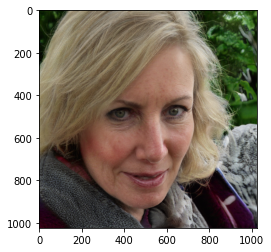

In [ ]:
imshow(img)

In [ ]:
img.save("/content/img.png")

In [ ]:
# imagev = encode(img).reshape((1,2048))
# x=plt.imread(img)
# plt.imshow(x)
# plt.show()
# print("Greedy:",greedySearch(imagev))

# BERT

In [ ]:
description = "Black"

In [ ]:
zs=[]
seed_count=0
#/content/drive/MyDrive/Text2Face/Dataset/stylegan_imgs
temp_img_path="/content/drive/MyDrive/Text2Face/Dataset/stylegan_imgs/"
for i in range(500,5500):
  print(i)
  seed = i
  print('Generating image for seed %d...' % (seed))
  rnd = np.random.RandomState(seed)
  z2 = rnd.randn(*Gs.input_shape[1:])
  zs.append(z2)
  seed_count+=1
  img=stylegan_generate_image(z2)
  #imshow(img)
  img.save(temp_img_path+"seed_"+str(i)+".png")

In [ ]:
np.save("/content/drive/MyDrive/Text2Face/Dataset/all_zs/zs_500_5500",np.array(zs))

NameError: ignored